In [207]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


In [208]:
# Load the dataset
df = pd.read_csv('breast_cancer_wisconsin.csv')

In [209]:
# Display the shape of the dataset
print("Dataset Shape:", df.shape) #The dataset has 699 rows and 10 columns

Dataset Shape: (699, 10)


In [210]:
# Check for null values in each column
print("\nNull Values in Each Column:\n", df.isnull().sum())



Null Values in Each Column:
 Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [211]:
# Display the data types of all columns
print("\nData Types:\n", df.dtypes)


Data Types:
 Clump_thickness                  int64
Uniformity_of_cell_size          int64
Uniformity_of_cell_shape         int64
Marginal_adhesion                int64
Single_epithelial_cell_size      int64
Bare_nuclei                    float64
Bland_chromatin                  int64
Normal_nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object


In [212]:
# Display summary statistics for all columns
summary_statistics = df.describe()  # Get summary statistics

# Print summary statistics with an extra blank line after
print("\nSummary Statistics:\n", summary_statistics, "\n")  



Summary Statistics:
        Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
count       699.000000               699.000000                699.000000   
mean          4.417740                 3.134478                  3.207439   
std           2.815741                 3.051459                  2.971913   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
count         699.000000                   699.000000   683.000000   
mean            2.806867                     3.216023     3.544656   
std             2.855379                     2.214300     3.643857   
min 

In [214]:
# Convert all columns to numeric and coerce errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

In [215]:
# Verify if any NaN values were introduced during the conversion
print("\nNaN Values After Conversion to Numeric:\n", df.isnull().sum())


NaN Values After Conversion to Numeric:
 Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


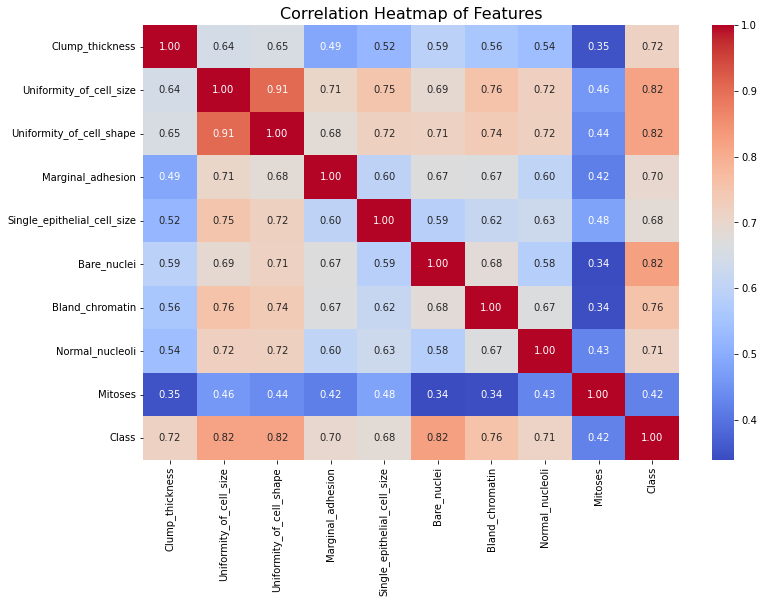

In [216]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()


### Univariate Analysis

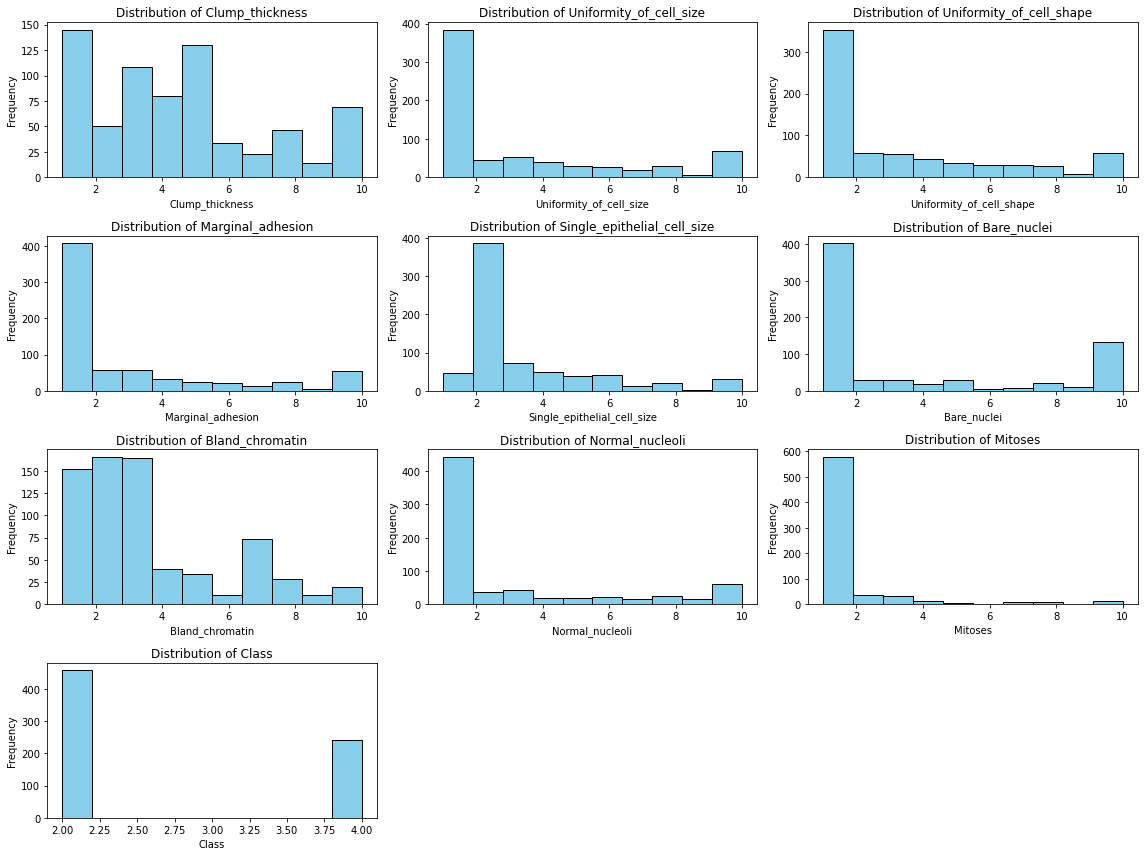

In [217]:

# Analyze distributions and summary statistics for all features

# Plot histograms for all features
plt.figure(figsize=(16, 12))  # Set the figure size
for i, column in enumerate(df.columns, 1):  # Loop through each column
    plt.subplot(4, 3, i)  # Create subplots for each feature
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')  # Plot histogram
    plt.title(f"Distribution of {column}", fontsize=12)  # Add title
    plt.xlabel(column, fontsize=10)  # Add x-axis label
    plt.ylabel("Frequency", fontsize=10)  # Add y-axis label
plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display all plots



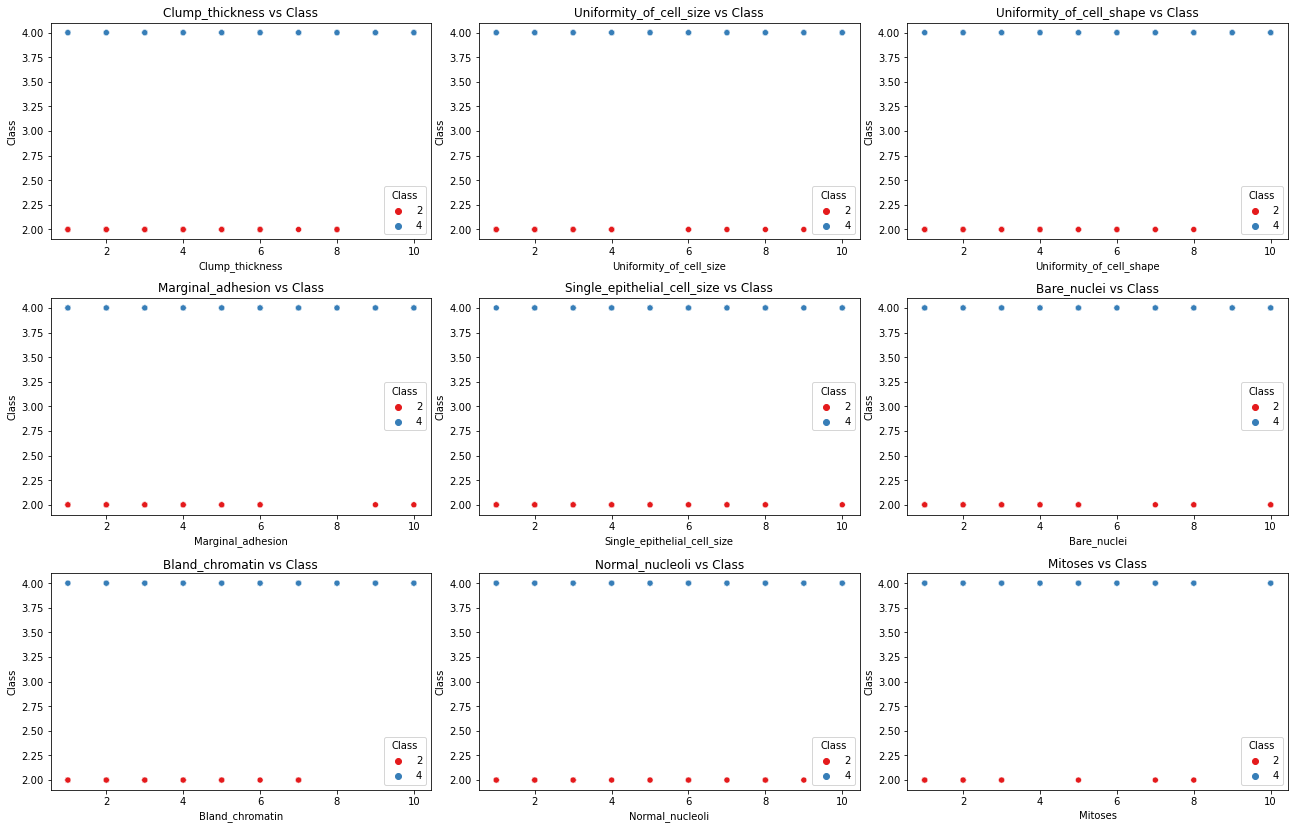

In [218]:
# Scatter Plots for Feature Relationships with Class

# Visualize relationships between features and the target variable using scatter plots

# Define the target variable and feature list
target_variable = "Class"
features = [col for col in df.columns if col != target_variable]

# Create scatter plots for each feature against the target variable
plt.figure(figsize=(18, 15))  # Set the figure size
for i, feature in enumerate(features, 1):  # Loop through each feature
    plt.subplot(4, 3, i)  # Create subplots for each feature
    sns.scatterplot(x=df[feature], y=df[target_variable], hue=df[target_variable], palette="Set1")
    plt.title(f"{feature} vs {target_variable}", fontsize=12)  # Add title
    plt.xlabel(feature, fontsize=10)  # Add x-axis label
    plt.ylabel(target_variable, fontsize=10)  # Add y-axis label
plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display all plots


# Data Cleaning

In [219]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [220]:
# Check for outliers using interquartile range (IQR) method
for column in df.columns:
    if column != "Class":  # Exclude the target variable
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Outliers detected in {column}: {len(outliers)}")

Outliers detected in Clump_thickness: 0
Outliers detected in Uniformity_of_cell_size: 0
Outliers detected in Uniformity_of_cell_shape: 0
Outliers detected in Marginal_adhesion: 60
Outliers detected in Single_epithelial_cell_size: 54
Outliers detected in Bare_nuclei: 0
Outliers detected in Bland_chromatin: 20
Outliers detected in Normal_nucleoli: 77
Outliers detected in Mitoses: 120


In [221]:
# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')


In [222]:
# Recheck for NaN values after numeric conversion
nan_after_conversion = df.isnull().sum()
print("\nNaN Values After Numeric Conversion:\n", nan_after_conversion)



NaN Values After Numeric Conversion:
 Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [223]:
# Handling Missing Values

# Fill missing values in 'Bare_nuclei' with the median
df["Bare_nuclei"].fillna(df["Bare_nuclei"].median(), inplace=True)

# Verify that there are no remaining missing values
missing_values_after_imputation = df.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after_imputation)


Missing Values After Imputation:
 Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


Class Distribution:
 2    458
4    241
Name: Class, dtype: int64


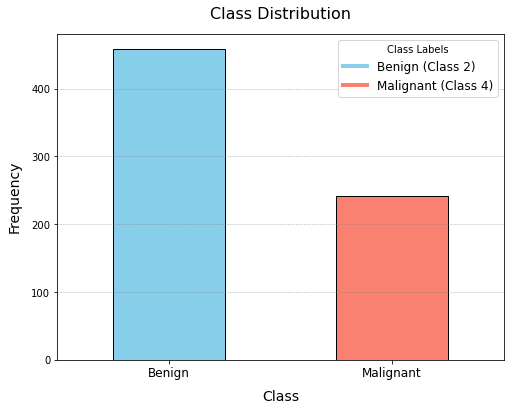

In [253]:
# Check for Class Imbalance
class_distribution = df["Class"].value_counts()
print("Class Distribution:\n", class_distribution)

# Visualize Class Distribution
plt.figure(figsize=(8, 6))

# Bar plot with enhanced aesthetics
bars = class_distribution.plot(
    kind="bar", 
    color=["#87CEEB", "#FA8072"],  # Skyblue and Salmon colors
    edgecolor="black"
)

# Add legends for both bars
benign_patch = plt.Line2D([0], [0], color="#87CEEB", lw=4, label="Benign (Class 2)")
malignant_patch = plt.Line2D([0], [0], color="#FA8072", lw=4, label="Malignant (Class 4)")
plt.legend(handles=[benign_patch, malignant_patch], fontsize=12, loc="upper right", title="Class Labels")

# Add a title and axis labels with padding and improved font sizes
plt.title("Class Distribution", fontsize=16, pad=15)
plt.xlabel("Class", fontsize=14, labelpad=10)
plt.ylabel("Frequency", fontsize=14, labelpad=10)

# Adjust x-axis ticks for better readability
plt.xticks(ticks=[0, 1], labels=["Benign", "Malignant"], fontsize=12, rotation=0)

# Add gridlines for better readability
plt.grid(axis="y", color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Save the plot with high resolution
plt.savefig("Class_Distribution_with_Two_Legends.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [225]:
# Detect Multicollinearity using VIF
X = df.drop(columns="Class")  # Features only
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF scores
print("Variance Inflation Factor (VIF):\n", vif_data)

Variance Inflation Factor (VIF):
                        Feature        VIF
0              Clump_thickness   5.214665
1      Uniformity_of_cell_size  13.950437
2     Uniformity_of_cell_shape  14.070702
3            Marginal_adhesion   4.837410
4  Single_epithelial_cell_size   6.824419
5                  Bare_nuclei   4.816474
6              Bland_chromatin   7.513534
7              Normal_nucleoli   4.546489
8                      Mitoses   2.547189


In [226]:
# Create a new DataFrame for the cleaned dataset
df_cleaned = df.drop(columns=["Uniformity_of_cell_shape"])

# Recompute VIF after dropping the feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Separate features from the target variable
X = df_cleaned.drop(columns="Class")  # Features only

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display updated VIF scores
print("Updated Variance Inflation Factor (VIF):\n", vif_data)


Updated Variance Inflation Factor (VIF):
                        Feature       VIF
0              Clump_thickness  5.106167
1      Uniformity_of_cell_size  8.093042
2            Marginal_adhesion  4.835889
3  Single_epithelial_cell_size  6.797644
4                  Bare_nuclei  4.667551
5              Bland_chromatin  7.496312
6              Normal_nucleoli  4.451392
7                      Mitoses  2.547188


# Linear Regression

In [228]:
# Split the data into train and test sets
X = df_cleaned.drop(columns="Class")  # Features
y = df_cleaned["Class"]  # Target

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform on test data


In [229]:
# Initialize and train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [230]:
# Coefficients and Intercept
print("Intercept:", linreg.intercept_)  # The model intercept
print("\nCoefficients (Feature Weights):")
coefficients = pd.DataFrame(linreg.coef_, X.columns, columns=["Coefficient"])
print(coefficients)

Intercept: 2.701252236135957

Coefficients (Feature Weights):
                             Coefficient
Clump_thickness                 0.183772
Uniformity_of_cell_size         0.211922
Marginal_adhesion               0.028976
Single_epithelial_cell_size     0.049942
Bare_nuclei                     0.359774
Bland_chromatin                 0.107374
Normal_nucleoli                 0.076974
Mitoses                         0.014775


In [231]:
# Predict on test data
y_pred_linreg = linreg.predict(X_test_scaled)

In [232]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred_linreg)
r2 = r2_score(y_test, y_pred_linreg)

In [233]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error (MSE): 0.1516
R-squared: 0.8262


In [234]:
# Residuals Analysis (Prediction errors)
residuals = y_test - y_pred_linreg
print('\nresiduals\n', residuals)


residuals
 158    0.110319
499   -0.104118
396   -0.083005
155    0.560360
321   -0.083005
         ...   
24     0.045804
218    0.201557
431   -0.301701
281   -0.028724
110   -0.346995
Name: Class, Length: 140, dtype: float64


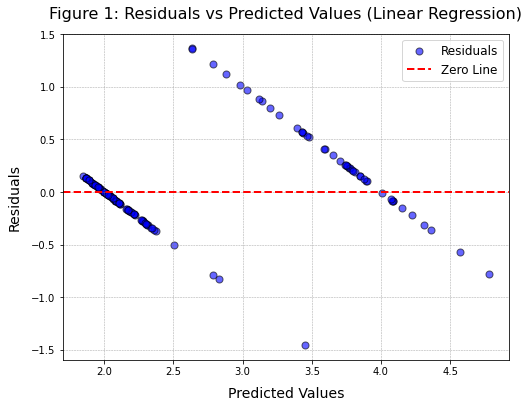

In [235]:
# Plotting and labeling the residuals plot for Linear Regression
plt.figure(figsize=(8, 6))

# Scatter plot with enhanced markers and transparency
plt.scatter(y_pred_linreg, residuals, color='blue', edgecolor='black', alpha=0.6, s=50, label="Residuals")

# Adding a zero reference line
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label="Zero Line")

# Title and axis labels with improved font sizes and padding
plt.title("Figure 1: Residuals vs Predicted Values (Linear Regression)", fontsize=16, pad=15)
plt.xlabel("Predicted Values", fontsize=14, labelpad=10)
plt.ylabel("Residuals", fontsize=14, labelpad=10)

# Adding a legend for clarity
plt.legend(fontsize=12, loc="upper right")

# Adding a grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Save the plot with high resolution
plt.savefig("Figure_1_Residuals_Linear_Regression.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


# Logistic Regression

In [236]:
# Split the data into training and testing sets (80% train, 20% test)
X = df.drop(columns="Class")
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [238]:
# Initialize Logistic Regression with class balancing
logreg = LogisticRegression(max_iter=1000, class_weight="balanced")

# Train the Logistic Regression model
logreg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [239]:
# Predict on test data
y_pred_logreg = logreg.predict(X_test_scaled)

In [240]:
# Model evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg * 100:.2f}%")

Accuracy: 97.14%


In [241]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))


Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



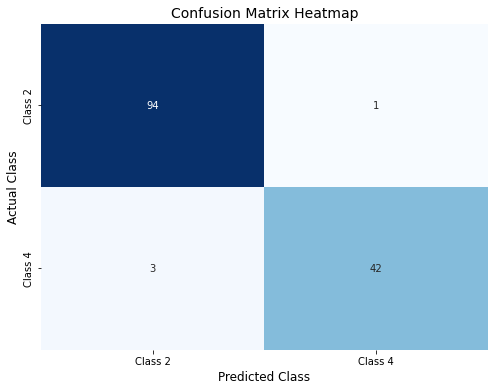

In [242]:
# Visualize the Confusion Matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 2", "Class 4"], yticklabels=["Class 2", "Class 4"], cbar=False)

plt.title('Confusion Matrix Heatmap', fontsize=14)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Actual Class', fontsize=12)
plt.show()

In [243]:
# Feature Importance (Logistic Regression Coefficients)
coefficients = pd.DataFrame(logreg.coef_[0], X.columns, columns=["Coefficient"])
coefficients["Abs Coefficient"] = coefficients["Coefficient"].abs()

# Sort the coefficients by absolute value
sorted_coefficients = coefficients.sort_values(by="Abs Coefficient", ascending=False)

# Display the sorted coefficients
print("\nSorted Feature Importance:\n", sorted_coefficients)



Sorted Feature Importance:
                              Coefficient  Abs Coefficient
Bare_nuclei                     1.587684         1.587684
Clump_thickness                 1.432928         1.432928
Uniformity_of_cell_shape        0.906298         0.906298
Bland_chromatin                 0.882722         0.882722
Marginal_adhesion               0.670354         0.670354
Mitoses                         0.511875         0.511875
Uniformity_of_cell_size         0.345700         0.345700
Single_epithelial_cell_size     0.245679         0.245679
Normal_nucleoli                 0.111288         0.111288


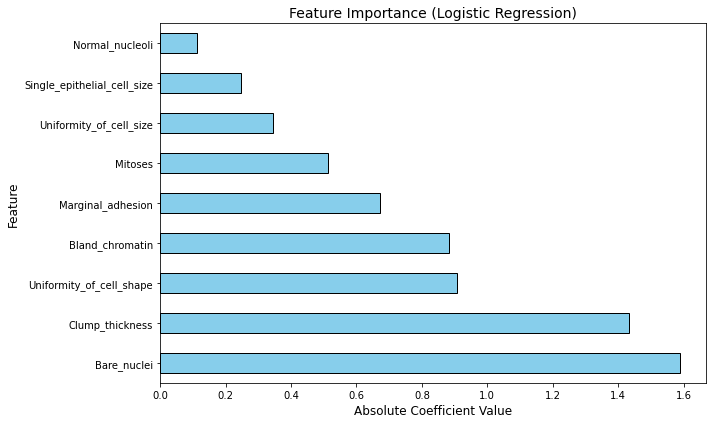

In [244]:
# Plotting the feature importance
plt.figure(figsize=(10, 6))
sorted_coefficients["Abs Coefficient"].plot(kind="barh", color='skyblue', edgecolor='black')
plt.title("Feature Importance (Logistic Regression)", fontsize=14)
plt.xlabel("Absolute Coefficient Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


In [245]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold Cross-Validation
cross_val_results = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cross_val_results}")
print(f"Mean Cross-Validation Accuracy: {cross_val_results.mean():.2f}")


Cross-Validation Accuracy Scores: [0.94285714 0.94285714 0.99285714 0.97857143 0.98561151]
Mean Cross-Validation Accuracy: 0.97


In [246]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)


Best Parameters from Grid Search: {'C': 0.1, 'penalty': 'l2'}
Best Cross-validation Score: 0.9623873873873874


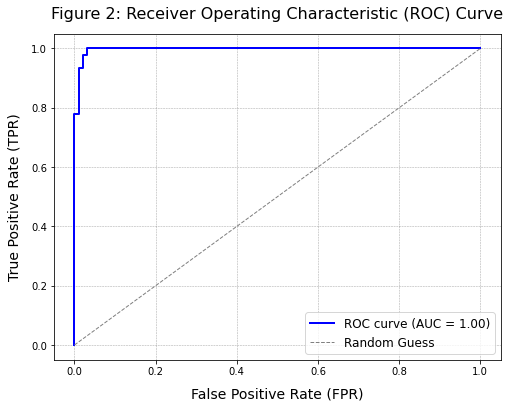

In [247]:
from sklearn.metrics import roc_curve, auc

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1], pos_label=4)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve with enhancements
plt.figure(figsize=(8, 6))

# Plot the ROC curve with a distinct style
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Add a diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1, label="Random Guess")

# Title and axis labels with improved font sizes and padding
plt.title("Figure 2: Receiver Operating Characteristic (ROC) Curve", fontsize=16, pad=15)
plt.xlabel("False Positive Rate (FPR)", fontsize=14, labelpad=10)
plt.ylabel("True Positive Rate (TPR)", fontsize=14, labelpad=10)

# Adding a legend for clarity
plt.legend(fontsize=12, loc="lower right")

# Adding a grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Save the plot with high resolution
plt.savefig("Figure_2_ROC_Curve_Logistic_Regression.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [248]:
residuals = y_test - y_pred_logreg
print("Logistic Regression Residuals:\n", residuals)

Logistic Regression Residuals:
 158    0
499    0
396    0
155    0
321    0
      ..
24     0
218    0
431    0
281    0
110    0
Name: Class, Length: 140, dtype: int64


### Linear Regression Model Evaluation (for comparison)

In [249]:
# Print the predicted values and actual values to compare
print("\nLinear Regression Predictions vs Actual Values:")
for i in range(10):  # Print the first 10 predictions vs actual values
    print(f"Predicted: {y_pred_linreg[i]}, Actual: {y_test.iloc[i]}")



Linear Regression Predictions vs Actual Values:
Predicted: 1.8896805820659117, Actual: 2
Predicted: 2.1041176632461345, Actual: 2
Predicted: 2.083005407807692, Actual: 2
Predicted: 3.4396403631801937, Actual: 4
Predicted: 2.083005407807692, Actual: 2
Predicted: 1.954195754809371, Actual: 2
Predicted: 2.371810484440673, Actual: 2
Predicted: 3.8938377511987396, Actual: 4
Predicted: 3.39340332035406, Actual: 4
Predicted: 2.635828037317097, Actual: 4


### Logistic Regression - Predictions vs Actual (Class Labels)

In [250]:
# Predict class labels for the test set
y_pred_logreg_class = logreg.predict(X_test_scaled)

# Display Predicted vs Actual Values for the first 10 instances
print("\nLogistic Regression Predictions vs Actual Values:")
for i in range(10):  
    # Display first 10 predictions vs actual values
    print(f"Predicted: {y_pred_logreg_class[i]}, Actual: {y_test.iloc[i]}")



Logistic Regression Predictions vs Actual Values:
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 4, Actual: 4
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 4, Actual: 4
Predicted: 4, Actual: 4
Predicted: 2, Actual: 4
